In [1]:
from ipywidgets import widgets

import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm, colors
import matplotlib.gridspec as gridspec
%matplotlib inline

# Temperature Response Function g

BHEs extracting heat from the ground cause a temperature cone $\Delta T(r, t)<0$ that increases with time.
According to Eskilson, the temperature response can be expressed by a non-dimensional function

\begin{eqnarray}
 g(r, t):= \frac{2 \pi \lambda_g}{q}\Delta T_{g}(r, t)
\end{eqnarray}

where $q >0$ is the extraction rate ([q]=W/m) and $\lambda_g$ the ground thermal conductivity.
The equation holds for $r \geq r_1$ where $r_1$ is the borehole radius.
Heat injection $q<0$ correspondingly causes a temperature increase $\Delta T(r, t)>0$.

## 1-BHE

For a single BHE and times largert than $t_{min}={5 r^2}/{a} $, this function is approximately given by

\begin{equation}
g(r,t) = 
\begin{cases}
\ln\left(\frac{H}{2r}\right) + 0.5 \ln\left(Es\right) & \mbox{if $t_{min} \leq t < t_s$}\\
\ln\left(\frac{H}{2r}\right) & \mbox{else}
\end{cases}
\end{equation}
where
\begin{equation}
Es := \frac{9at}{H^2}
\end{equation}
is the Eskilson-number, $a = \lambda_g / c_g \rho_g$ is the diffusivity, $c_g$ the capacity, and $\rho_g$ the density of the ground.
When $t \geq t_s = {H^2}/{9a}$ ($Es= 1$), the temperature field has reached a steady-state.


In [2]:
def Eskilson_number(_a, _H, _t):
     return 9. * _a * _t / (_H * _H)
    
def g_function(_H, _r, _a, _t):
    return np.log(_H / (2. * _r)) + 0.5 * np.log(Eskilson_number(_a, _H, _t))


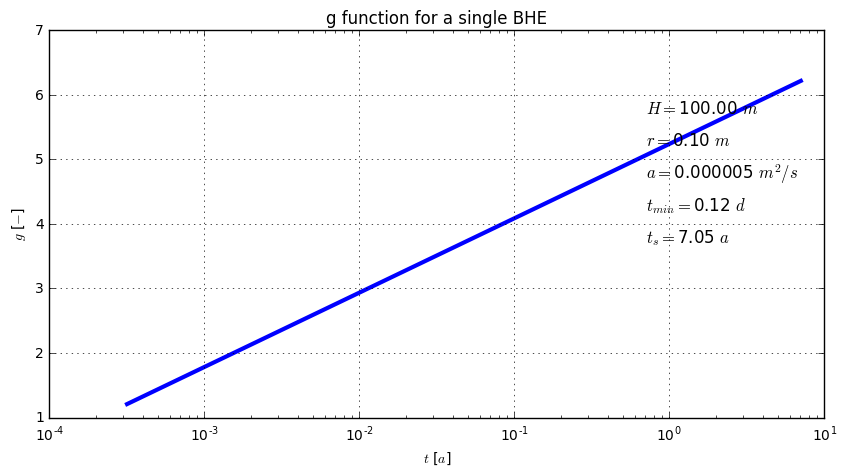

In [3]:
def plot_g_function(_H, _r, _a):

    plt.figure(1, figsize=(10, 5))

    ax = plt.subplot(111)

    t_s = 1. / Eskilson_number(_a, _H, 1.)
    t_min = 5. * _r * _r / _a
    
    #print("t_min: " + str(t_min) + " - t_s= " + str(t_s))

    times = np.array(range(int(t_min), int(t_s), 10000))
    gs = g_function(_H, _r, _a, times)

    ax.plot(times/(365.*86400), gs, color='blue', linewidth=3, label='a')
    ax.set_title(r'g function for a single BHE')
    ax.grid(True)

    xposition = np.min(times/(365.*86400)) + 0.1 * (np.max(times/(365.*86400)) - np.min(times/(365.*86400)))
    yposition = np.max(gs)
    yshift = - (yposition - np.min(gs))/10.
    
    ax.text(xposition, yposition + yshift, 
            r'$H=$' + '{0:.2f}'.format(_H) + ' $m$', fontsize=12)
    ax.text(xposition, yposition + 2*yshift, 
            r'$r=$' + '{0:.2f}'.format(_r) + ' $m$', fontsize=12)
    ax.text(xposition, yposition + 3*yshift, 
            r'$a=$' + '{0:.6f}'.format(_a) + ' $m^2/s$', fontsize=12)
    ax.text(xposition, yposition + 4*yshift, 
            r'$t_{min}=$' + '{0:.2f}'.format(t_min / (86400)) + ' $d$', fontsize=12)
    ax.text(xposition, yposition + 5*yshift,  
            r'$t_{s}=$' + '{0:.2f}'.format(t_s / (365*86400)) + ' $a$', fontsize=12)  

    ax.set_xlabel(r'$t$ [$a$]')
    ax.set_ylabel(r'$g$ [$-$]')
    ax.set_xscale('log')
    
#plot_g_function(10, 0.1,  2./400000)


widget_return = widgets.interact(plot_g_function, 
                                 _H=widgets.FloatSlider(value=100., min=10., max=1000., 
                                         step=10., readout_format='.0f'),
                                 _r=widgets.FloatSlider(value=.1, min=.1, max=10., 
                                         step=.1, readout_format='.1f'),
                                 _a=widgets.FloatSlider(value=5.e-6, min=1.e-6, max=1.e-5, 
                                         step=1.e-6, readout_format='.6f'),
                                )


-----

# Thermal Resistances

The heat transfer $q$ between the working fluid in the pipes and the ground at the borehole radius $r=r_1$ is calculated by using resistances

\begin{eqnarray}
\Delta T &=& R q \\
R &=& R_a + R_b + R_s
\end{eqnarray}
$R_s$ is the resistance of the pipe,
$R_a$ accounts for thermal interactions between working fluids in different pipes,
$R_b$ is the borehole resistance, which is between the working fluid in the pipes and the ground.

The resistances can be calculated from the BHE geometry and conductivities (pipe $\lambda_p$, filling $\lambda_f$, ground $\lambda_g$)

## 2U-BHE

For a 2U-BHE (inner pipe radius $r_i$, outer pipe radius $r_o$, borehole radius $r_1$, pipe distance $Bu$) as

\begin{eqnarray}
R_a &=& \frac{1}{\pi \lambda_f}
\left[
\frac{\sqrt{2} b r_1}{r_i} 
- \frac{1}{2} \ln\left(\frac{2br_1}{r_i}\right)
- \frac{\sigma}{2} \ln\left( \frac{1 - b^4}{ 1 + b^4}  \right)
\right] + R_s \\
R_s &=& \frac{1}{2 \pi \lambda_p}\ln\left(\frac{r_o}{r_i}\right) \\
R_b &=& 
\frac{1}{8 \pi \lambda_f}
\left[
\ln\left(\frac{r_1}{r_i}\right) 
+ \ln\left(\frac{r_1}{Bu}\right)
+ \sigma \ln\left(\frac{r_1^4}{ Bu^*  }\right)
- \frac{
\left( 1 - \frac{\sigma}{4} \frac{Bu^4}{Bu^*} \right)^2 \left(\frac{r_i}{Bu}\right)^2
}{
\frac{1+\beta}{1-\beta} + \left( 1+ \frac{\sigma \left(Bu r_1\right)^4}{(Bu^*)^2}   \right)  \left(\frac{r_i}{Bu}\right)^2
}
\right] 
\end{eqnarray}

where

\begin{eqnarray}
b &=& \frac{Bu}{2 r_1} \\
Bu^* &=& r_1^4 - \frac{Bu^4}{16} \\
\sigma &=& \frac{\lambda_f - \lambda_g}{\lambda_f + \lambda_g}
\end{eqnarray}




In [4]:
def calc_Ra(r_i, r_o, r_1, b, a, lambda_ground, lambda_filling, lambda_pipe):
    
    Rs = calc_Rs(r_i, r_o, lambda_pipe)
    sigma = calc_sigma(lambda_ground, lambda_filling)
    
    innerTerm_0 = np.log(np.sqrt(2.) * b * r_1 / r_i)
    innerTerm_1 = - 0.5 * np.log(2. * b * r_1 / r_i)
    innerTerm_2 = - 0.5 * sigma * np.log( (1 - pow(b, 4)) / (1 + pow(b, 4)) )
    
    term_0 = ( innerTerm_0 + innerTerm_1 + innerTerm_2 ) / (np.pi * lambda_filling)
    term_1 = Rs
                         
    return term_0 + term_1


def calc_Rs(r_i, r_o, lambda_pipe):
    return np.log(r_o / r_i) / (2. * np.pi * lambda_pipe)


def calc_Rb(_Bu, r_i, r_o, r_1, a, lambda_ground, lambda_filling, lambda_pipe):
    beta = lambda_filling * ( 1 / (r_i * a) + np.log(r_o / r_i) / lambda_pipe )
    sigma = calc_sigma(lambda_ground, lambda_filling)
    rB4 = pow(r_1, 4) - pow(_Bu, 4) / 16
    
    term_1 = np.log(r_1 / r_i)
    term_2 = np.log(r_1 / _Bu)
    term_3 = sigma * np.log( pow(r_1, 4) / rB4 )
    
    term_4_enumerator  = pow( 1 - sigma * 0.25 * pow(_Bu, 4) /rB4, 2 ) * pow(r_i / _Bu, 2)
    term_4_denominator = (1 + beta) / (1 - beta) + ( 1 + sigma * pow(_Bu * r_1, 4) / pow(rB4, 2) ) * pow(r_i / _Bu, 2)
    
    term_4 = - term_4_enumerator / term_4_denominator
    
    factor = 1. / ( 8. * np.pi * lambda_filling )
    
    beta = 0
    
    return ( beta + term_1 + term_2 + term_3 + term_4 ) * factor
     
def calc_sigma(lambda_ground, lambda_filling):
    return (lambda_filling - lambda_ground) / (lambda_filling + lambda_ground)

-----

# Temperature Calculations

Resistances and the g function are used to calculate temperatures in the pipe and the underground.
The temperatures of the working fluid entering and leaving the BHE are calculated as

\begin{equation}
T_{BC} = 
T_0 + \Delta T_0 z 
- \left( 
\frac{g(t,r_1)}{2\pi \lambda_g} + R_b + 
\frac{1}{3 R_a}  \left(\frac{H}{m c_p} \right)^2
\mp \frac{H}{2mc_p}
\right)q
\end{equation}

where $m$ is the mass flow rate. 
The sign $-$ is for outflow (outlet temperature) and $+$ for inflow (inlet temperature).

The temperature is assumed to increase initially linearly with depth: $T_0$ is the initial temperature averaged over the BHE-length and $\Delta T_0$ the initial depth gradient, that is calculated from the geothermal heat flux $q_{geo}$ as
\begin{eqnarray}
\Delta T_0 = \frac{q_{geo}}{\lambda_g}
\end{eqnarray}

The temperature of the working fluid moving though the BHE is calculated as

\begin{equation}
T_f = T_0 + \Delta T_0 \frac{H}{2} - \left(
\frac{g}{2\pi\lambda_g}
+ R_b
 + \frac{ \frac{H^2}{3} - zH + \frac{z^2}{2}  }{R_a (mc_p)^2}
 \pm \frac{H- z}{2 mc_p}
\right)q
\end{equation}

The sign $-$ is for the fluid in the inflow pipe and $+$ for the fluid in the outflow pipe.

Temperature in the ground $r\geq r_1$ is given by the g-function as

\begin{equation}
T_g = T_0 + \Delta T_0 z - \frac{q}{2\pi \lambda_g} g(t,r)
\end{equation}


In [5]:
def calc_temperature_BC(T0, Delta_T0, H, r_1, _Ra, _Rb, lambda_ground, a, cp, m, q, t, flag_inflow=False):
    
    term_0 = g_function(H, r_1, a, t) / ( 2 * np.pi * lambda_ground)
    term_1 = _Rb
    term_2 = pow(H / (m * cp), 2) / (3 * _Ra)
    term_3 = - H / (2 * m * cp)
    if flag_inflow:
        term_3 = - term_3
    
    return T0 + 0.5 * H * Delta_T0 - (term_0 + term_1 + term_2 + term_3) * q


def calc_temperature_fluid(T0, Delta_T0, H, r_1, _Ra, _Rb, lambda_ground, a, cp, m, q, t, z, flag_outflowPipe=False):
    
    term_0 = g_function(H, r_1, a, t) / ( 2. * np.pi * lambda_ground )
    term_1 = _Rb
    term_2 = ( H * H * 0.333333333333 - z * H + z * z * 0.5 ) / ( _Ra * m * m * cp * cp )
    term_3 = ( H - z ) / ( 2. * m * cp )
    
    #print("    T_f - Term 0: " + str(term_0))
    #print("    T_f - Term 1: " + str(term_1))
    #print("    T_f - Term 2: " + str(term_2))
    #print("    T_f - Term 3: " + str(term_3))
    
    # print("q: " + str(q))

    if flag_outflowPipe:
        term_3 = - term_3
    
    return T0 + z * Delta_T0 - (term_0 + term_1 + term_2 + term_3) * q    
    
# T0 average temperature, undisturbed ground
def calc_temperature_ground(T0, Delta_T0, H, lambda_g, a, q, r, z, t):
    return T0 + z * Delta_T0 - g_function(H, r, a, t) * q / (2 * np.pi * lambda_g)


def calc_temperature_ground_initialState(T0, Delta_T0, H, lambda_g, a, q, r, z, t):
    return T0 + z * Delta_T0 + 0 * t


-----

In [6]:
def plot(_geometry, _material, _fluid, _fluxes, _state, _resistances, _time, 
         flag_calculateResistances=False, flag_print=False):
    
    if flag_print:
        geometry.myPrint()
        fluid.myPrint()
        material.myPrint()
        fluxes.myPrint()
        state.myPrint()

    t_s = 1 / Eskilson_number(_material.diffusivity, _geometry.pipeLength, 1)
    t_min = 5. * _geometry.radiusBorehole * _geometry.radiusBorehole / _material.diffusivity

    if flag_calculateResistances:
        _resistances.Ra = calc_Ra(_geometry.radiusPipeInner, _geometry.radiusPipeOuter, 
                                  _geometry.radiusBorehole, _geometry.excentricity(), 
                                  _material.diffusivity, _material.conductivityGround,
                                  _material.conductivityFilling, _material.conductivityPipe)
        _resistances.Rb = calc_Rb(_geometry.Bu, _geometry.radiusPipeInner,
                                  _geometry.radiusPipeOuter, _geometry.radiusBorehole, 
                                  _material.diffusivity, _material.conductivityGround, 
                                  _material.conductivityFilling, _material.conductivityPipe)
        
    plt.figure(1, figsize=(20, 10))

    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    plt.subplots_adjust(hspace=.5)
    plt.subplots_adjust(wspace=.5)
    ##### time curves

    times = np.array(range(int(t_min+1), int(t_s)-1, 1000000))
    

    temperatures = calc_temperature_BC(_state.temperature_average_origin, _state.temperature_gradient_origin,
                                       _geometry.pipeLength, _geometry.radiusBorehole,
                                       _resistances.Ra, _resistances.Rb, 
                                       _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity, 
                                       _fluxes.massFlux, _fluxes.extractionRate, times, flag_inflow=False)

    ax1.plot(times / 86400, temperatures, color='red', linewidth=3, label='Out')

    temperatures = calc_temperature_BC(_state.temperature_average_origin, _state.temperature_gradient_origin,
                                       _geometry.pipeLength, _geometry.radiusBorehole, 
                                       _resistances.Ra, _resistances.Rb,
                                       _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity,
                                       _fluxes.massFlux, _fluxes.extractionRate, times, flag_inflow=True)

    ax1.plot(times / 86400, temperatures, color='blue', linewidth=3, label='In')

    ax1.set_title(r'$R_a$' + '={0:.2f}'.format(_resistances.Ra) 
                  + r' - $R_b$' + '={0:.2f}'.format(_resistances.Rb))
    ax1.set_xscale('log')
    ax1.set_xlabel('t [d]')
    ax1.set_ylabel(r'T [$^0$C]')
    legend = ax1.legend(loc='upper right', shadow=True)
    
    ####### depth profiles

    # first the BC values
    T_out = calc_temperature_BC(_state.temperature_average_origin, _state.temperature_gradient_origin,
                                _geometry.pipeLength, _geometry.radiusBorehole,
                                _resistances.Ra, _resistances.Rb,
                                _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity, 
                                _fluxes.massFlux, _fluxes.extractionRate, _time, flag_inflow=False)

    T_in = calc_temperature_BC(_state.temperature_average_origin, _state.temperature_gradient_origin,
                               _geometry.pipeLength, _geometry.radiusBorehole,
                               _resistances.Ra, _resistances.Rb,
                               _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity, 
                               _fluxes.massFlux, _fluxes.extractionRate, _time, flag_inflow=True)

    # now the depth profiles
    Z = np.array(range(0, int(_geometry.pipeLength)+1))

    temperatures = calc_temperature_fluid(_state.temperature_average_origin, _state.temperature_gradient_origin,
                                          _geometry.pipeLength, _geometry.radiusBorehole,
                                          _resistances.Ra, _resistances.Rb,
                                          _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity,
                                          _fluxes.massFlux, _fluxes.extractionRate,
                                          _time, Z, flag_outflowPipe=True)

    ax2.plot(temperatures, -Z, color='Red', linewidth=3, 
             label=r'Out ($T_{BC}$=' + '{0:.2f}'.format(T_out) + r' $^0$C)')

    temperatures = calc_temperature_fluid(_state.temperature_average_origin, _state.temperature_gradient_origin,
                                          _geometry.pipeLength, _geometry.radiusBorehole,
                                          _resistances.Ra, _resistances.Rb,
                                          _material.conductivityGround, _material.diffusivity, _fluid.heatCapacity,
                                          _fluxes.massFlux, _fluxes.extractionRate,
                                          _time, Z, flag_outflowPipe=False)

    ax2.plot(temperatures, -Z, color='blue', linewidth=3, 
             label=r'In ($T_{BC}$=' + '{0:.2f}'.format(T_in) + r' $^0$C)')

    ax2.set_title('t={0:.2f}'.format(_time/(86400*365)) + ' years')
    ax2.set_xlabel(r'T [$^0$C]')
    ax2.set_ylabel('Z [m]')
    legend = ax2.legend(loc='upper right', shadow=True)
    ax2.grid(True)
    ax1.grid(True)

    #####

    resolution = 2  # contour plot
    timeSteps = 5
    N = 10
    r_min= 0.1
    r_max= 2


    r = np.linspace(r_min, r_max, N)
    z = np.linspace(0., _geometry.pipeLength, N)

    R, Z = np.meshgrid(r, z)

    t_s = 1 / Eskilson_number(_material.diffusivity, _geometry.pipeLength, 1)
    t_min = 5. * r_max * r_max / _material.diffusivity

    times = list()
    times.append(0.)
    times.append(t_min)
    times.append(t_min + (t_s - t_min) / 3)
    times.append(t_min + (t_s - t_min) * 2 / 3)
    times.append(t_s)

    T = list()

    # calculating
    for i in range(0, timeSteps):
        time = times[i]
        if( time < t_min ):
            T.append(calc_temperature_ground_initialState(_state.temperature_average_origin, _state.temperature_gradient_origin,  
                                                          _geometry.pipeLength, _material.conductivityGround, 
                                                           _material.diffusivity, _fluxes.extractionRate, 
                                                          R, Z, time))
        else:
            T.append(calc_temperature_ground(_state.temperature_average_origin, _state.temperature_gradient_origin,  
                                             _geometry.pipeLength, _material.conductivityGround, 
                                             _material.diffusivity, _fluxes.extractionRate, 
                                             R, Z, time))

    totalMin = int(np.min(T))
    totalMax = np.max(T)

    # plotting
    for i in range(0, timeSteps):    
        norm = cm.colors.Normalize(vmax=totalMax, vmin=totalMin)
        ax3 = plt.subplot(2,timeSteps,timeSteps+1+i)
        cmap = plt.get_cmap('RdBu')
        levels = np.arange(totalMin-resolution, totalMax+resolution, resolution)
        cs = ax3.contourf(R, -Z, T[i], levels,cmap=cm.get_cmap(cmap, len(levels)-1), norm=norm)
        ax3.set_title('t={0:.2f}'.format(times[i]/(86400*365)) + ' years')
        ax3.text(r_min + (r_max-r_min)/10, -_geometry.pipeLength / 10, 
                 r'$T_{min}=$' + '{0:.2f}'.format(np.min(T[i])) + ' $^0$C', fontsize=10)
        ax3.text(r_min + (r_max-r_min)/10, -2*_geometry.pipeLength / 10, 
                 r'$T_{max}=$' + '{0:.2f}'.format(np.max(T[i])) + ' $^0$C', fontsize=10)

    plt.colorbar(cs, ax=ax3)



-----

Geometry:
    Pipe length H (m):           200.0
    Borehole radius r_1 (m):      0.15
    Inner pipe radius r_i (m):    0.029
    Outer pipe radius r_o (m):    0.031
    Pipe distance Bu (m):        0.05
Fluid:
    Heat capacity cp (J/kgK):             1000.0
Material:
    Pipe conductivity lambda_p (W/mK):    0.3
    Filling conductivity lambda_f (W/mK): 2.0
    Ground conductivity lambda_g (W/mK):  2.4
    Diffusivity a (m2/s):                 5e-07
Fluxes:
    Mass flux m (kg/s):                   1.0
    Extraction rate q (W/m):              20.0
Initial state:
    Geothermal flux qgeo (W/m2):          0.1
    Initial temperature average T0 (K):   10.0


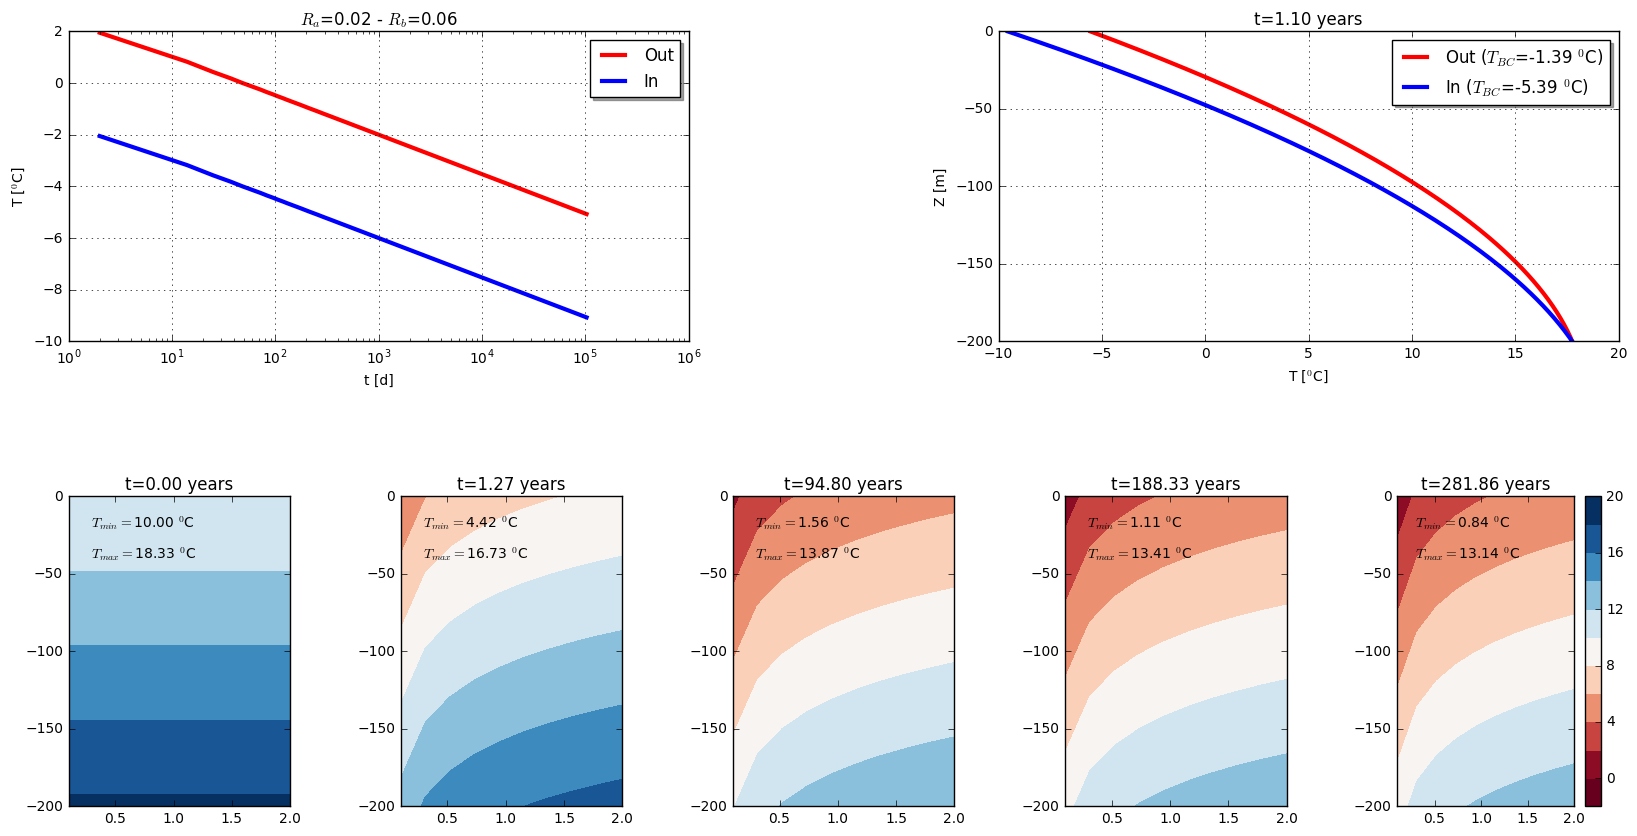

In [7]:

class Geometry:
    def __init__(self):
        self.pipeLength = 200.

        self.radiusBorehole = 0.15
        self.radiusPipeOuter = 0.031
        self.radiusPipeInner = 0.029
        self.Bu = 0.05
        
    def excentricity(self):
        return self.Bu / ( 2 * self.radiusBorehole )
    
    def myPrint(self):
        print('Geometry:')
        print('    Pipe length H (m):           ' + str(self.pipeLength))
        print('    Borehole radius r_1 (m):      ' + str(self.radiusBorehole))
        print('    Inner pipe radius r_i (m):    ' + str(self.radiusPipeInner))
        print('    Outer pipe radius r_o (m):    ' + str(self.radiusPipeOuter))
        print('    Pipe distance Bu (m):        ' + str(self.Bu))
        
class Fluid:
    def __init__(self):
        self.heatCapacity = 1000.

    def myPrint(self):
        print('Fluid:')
        print('    Heat capacity cp (J/kgK):             ' + str(self.heatCapacity))
        
class Material:
    def __init__(self):
        self.conductivityPipe = 0.3
        self.conductivityFilling = 2.
        self.conductivityGround = 2.4
        
        self.diffusivity = 2. / 4000000
        
    def myPrint(self):
        print('Material:')
        print('    Pipe conductivity lambda_p (W/mK):    ' + str(self.conductivityPipe))
        print('    Filling conductivity lambda_f (W/mK): ' + str(self.conductivityFilling))
        print('    Ground conductivity lambda_g (W/mK):  ' + str(self.conductivityGround))
        print('    Diffusivity a (m2/s):                 ' + str(self.diffusivity))
        
class Fluxes:
    def __init__(self):
        self.massFlux = 1.
        self.extractionRate = 20.

    def myPrint(self):
        print('Fluxes:')
        print('    Mass flux m (kg/s):                   ' + str(self.massFlux))
        print('    Extraction rate q (W/m):              ' + str(self.extractionRate))

class State:
    def __init__(self, material):
        self.rate_geothermal = 0.1
        self.temperature_average_origin = 10.
        self.temperature_gradient_origin = self.rate_geothermal / material.conductivityGround

    def myPrint(self):
        print('Initial state:')
        print('    Geothermal flux qgeo (W/m2):          ' + str(self.rate_geothermal))
        print('    Initial temperature average T0 (K):   ' + str(self.temperature_average_origin))
        
class Resistances:
    def __init__(self):
        self.Ra = 0.35
        self.Rb = 0.12
        
time = 400*86400.

geometry = Geometry()
fluid = Fluid()
material = Material()
fluxes = Fluxes()
state = State(material)
resistances = Resistances()




plot(geometry, material, fluid, fluxes, state, resistances, time, 
     flag_calculateResistances=True, flag_print=True)

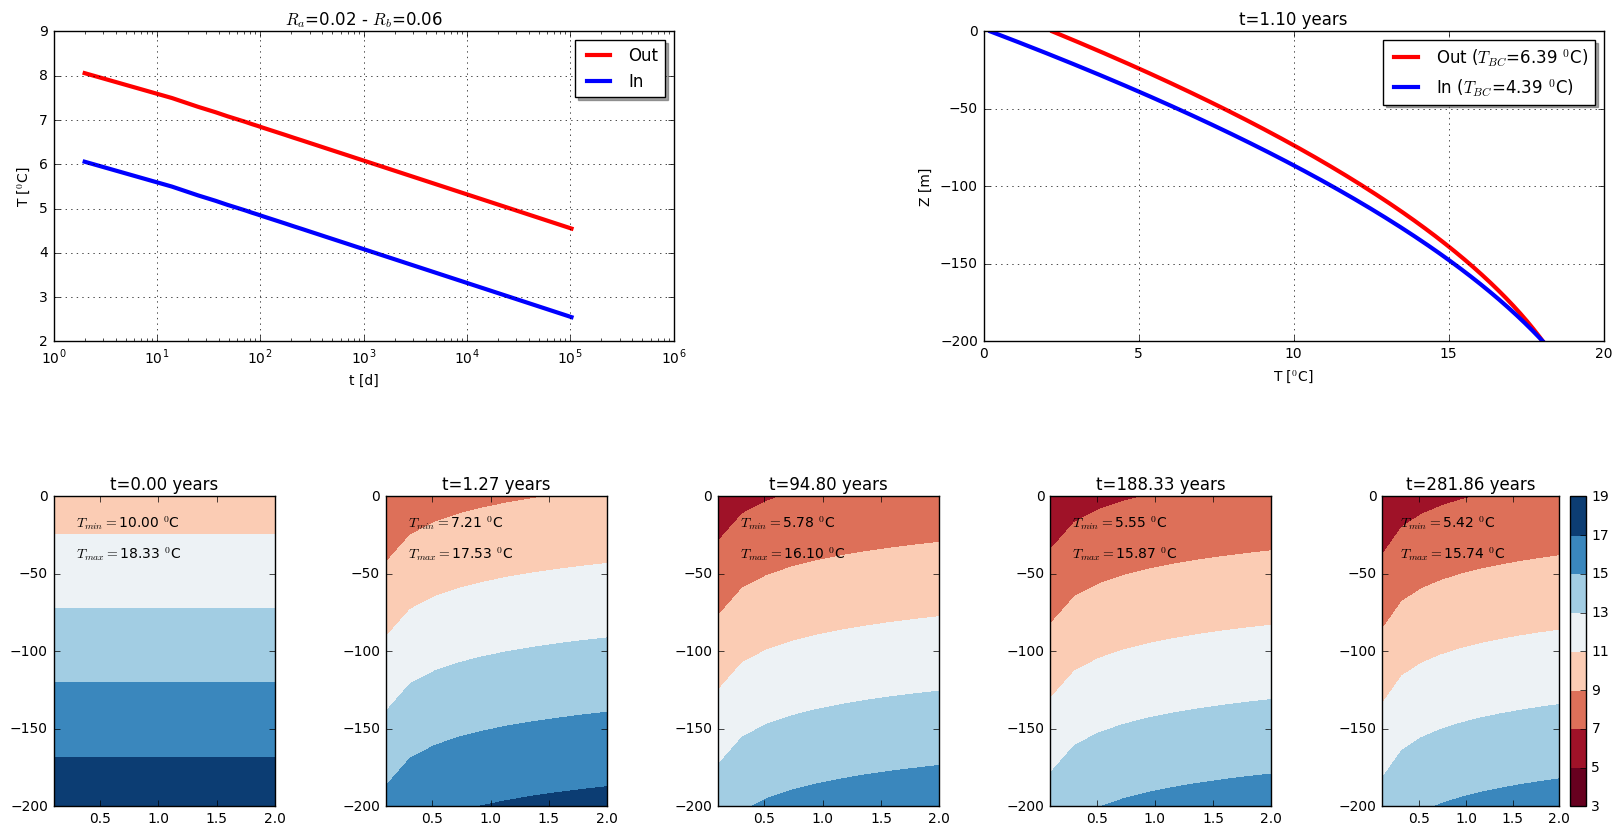

In [8]:
def plot_parameterized(_pipeLength, _extractionRate, _time):
    # global variables
    geometry.pipeLength = _pipeLength
    fluxes.extractionRate = _extractionRate
    plot(geometry, material, fluid, fluxes, state, resistances, _time*86400, flag_calculateResistances=True)

widget_return = widgets.interact(plot_parameterized, 
                                _time=widgets.FloatSlider(value=400., min=100., max=100000., 
                                         step=100., readout_format='.0f'),
                                 _pipeLength=widgets.FloatSlider(value=200., min=10., max=300., 
                                         step=10., readout_format='.0f'),
                                 _extractionRate=widgets.FloatSlider(value=10, min=0., max=100., 
                                         step=1., readout_format='.0f'),
                                )


-----

In [26]:
class Matrix:
    a = 0  # lower diagonal a[0] = 0
    b = 0  # diagonal
    c = 0  # upper diagonal c[dim-1] = 0
        
    def __init__(self):
        pass

        

class Solver:
    
    def __init__(self):
        self.__a = 0
        self.__beta = 0
        self.__gamma = 0
        
    
    def do_LU_decomposition(self, m):

        dim = m.b.size
        
        self.__a = m.a
        self.__beta = np.zeros(dim)
        self.__gamma = np.zeros(dim-1)  # last entry 0

        self.__beta[0] = m.b[0]
        self.__gamma[0] = m.c[0] / self.__beta[0]

        for i in range(1, dim-1):
            self.__beta[i] = m.b[i] - (m.a[i]*self.__gamma[i-1])
            self.__gamma[i] = m.c[i] / self.__beta[i]

        self.__beta[dim-1] = m.b[dim-1] - (m.a[dim-1]* self.__gamma[dim-2])
        
        # print(self.__beta)
        # print(self.__gamma)

    def solve_LU(self, r):
        
        dim = self.__beta.size
        # forward step
        z = np.zeros(dim)
        z[0] = r[0] / self.__beta[0]

        for i in range(1, dim):
            z[i] = (r[i] - self.__a[i] * z[i-1]) / self.__beta[i]

        # backward step        
        u = np.zeros(dim)
        
        u[dim-1] = z[dim-1]
        for i in reversed(range(0, dim-1)):
            u[i] = z[i] - self.__gamma[i] * u[i+1]
            
        return u
    
    def solve(self, m, r):
        self.do_LU_decomposition(m)
        return self.solve_LU(r)

class Grid:
    def __init__(self, dim):
        self.__x  = np.empty(dim)
        for i in range(dim):
            self.__x[i] = i
            
        self.__x2 = np.empty(dim-1)
        for i in range(dim-1):
            self.__x2[i] = i + 0.5
            
        self.__dx  = np.zeros(dim)
        self.__dx2  = np.zeros(dim-1)
        
        for i in range(1, dim-1):
            self.__dx[i] = 0.5 * (self.__x[i+1] - self.__x[i-1])
            
        for i in range(0, dim-2):
            self.__dx2[i] = self.__x[i+1] - self.__x[i]
        
        
    @property            
    def x(self):
        return self.__x
 
    @property            
    def x2(self):
        return self.__x2
    
    @property 
    def dx(self):
        return self.__dx

    @property 
    def dx2(self):
        return self.__dx2
    
class Parameter:
    def __init__(self, dim): 
        self.__capacity  = np.ones(dim)
        self.__conductivity = np.ones(dim-1)
        
    @property
    def capacity(self):
        return self.__capacity
    
    @property
    def conductivity(self):
        return self.__conductivity

            
class Problem:
    def __init__(self, dim):     
        self.__grid = Grid(dim)
        self.__parameter = Parameter(dim)
    
        self.__m = Matrix()
        self.__r = int()  # right hand side array
        self.__solver = Solver()
        self.__result = np.zeros(dim)
        
        self.__dim = dim
    
    @property
    def grid(self):
        return self.__grid
    
    def assemble_laplace(self):
        pass
        #for i in range(dim):
        #    self.__m.b = 
        
        
    def assemble(self):
        self.assemble_laplace()
        #self.__m.a = -np.ones(dim)
        #self.__m.b = 2 * np.ones(dim)
        #self.__m.c = -np.ones(dim)

        #self.__m.a[0] = 0
        #self.__m.c[dim-1] = 0

    def incorporate_BCs(self, value_left, value_rigth):
        
        dim = self.__m.b.size
        
        self.__m.c[0] = 0
        self.__m.a[dim-1] = 0

        self.__m.b[0] = 1.
        self.__m.b[dim-1] = 1.

        self.__r = np.zeros(dim)  # right hand side
        self.__r[0] = value_left
        self.__r[dim-1] = value_rigth

    def solve(self):
        self.__result = self.__solver.solve(self.__m, self.__r) 
        
    def print_result(self):
        print(self.__result)

problem = Problem(10)


#problem.assemble(11)
#problem.incorporate_BCs(0., 1.)
#problem.solve()
#problem.print_result()
        


In [ ]:
[ 1.          1.12421073  1.22724377  1.37316776  1.55117269  1.73126464
  1.87585585  1.96162064  1.9944065   2.        ]

In [36]:

a = np.ones(10)
a2 = 2*np.ones(9)
b= np.zeros(10)

b[:-1] = a[:-1]*a2
b[0]=3
b[1:-1]

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [39]:
x = np.arange(10)
np.roll(x, 1)

array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8])